In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# Display the first few rows of each dataset
print("Train Data Head:\n", train_df.head())
print("\nTest Data Head:\n", test_df.head())

Train Data Head:
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_sc

In [ ]:
# Prepare train features and target
X_train = train_df.drop('price_range', axis=1)
y_train = train_df['price_range']


In [ ]:
# Remove the 'id' column from test features
X_test = test_df.drop('id', axis=1)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')  # Use softmax for multi-class classification
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
50/50 [==============================] - 2s 13ms/step - loss: 1.4352 - accuracy: 0.2562 - val_loss: 1.3645 - val_accuracy: 0.3050
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 1.3703 - accuracy: 0.2981 - val_loss: 1.3195 - val_accuracy: 0.4125
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 1.3289 - accuracy: 0.3431 - val_loss: 1.2394 - val_accuracy: 0.5250
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 1.2342 - accuracy: 0.4119 - val_loss: 1.0907 - val_accuracy: 0.5625
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 1.1171 - accuracy: 0.4762 - val_loss: 0.9137 - val_accuracy: 0.6075
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 1.0162 - accuracy: 0.5094 - val_loss: 0.7898 - val_accuracy: 0.6575
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.9077 - accuracy: 0.5569 - val_loss: 0.7036 - val_accuracy: 0.6850
Epoch 8/100


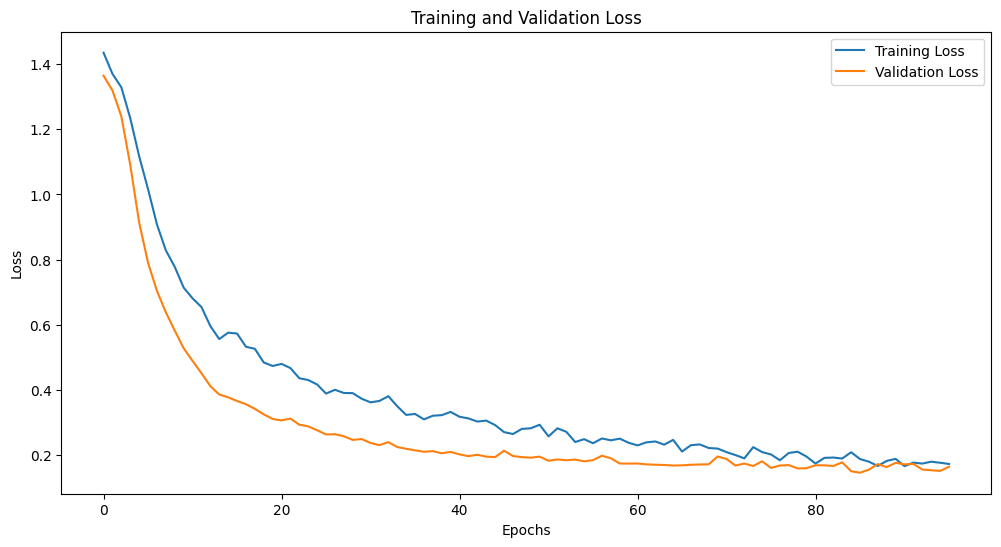

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()